In [1]:
# 最简单的模型，只用一个节点

import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # 不使用GPU

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers.core import Dropout

import time
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
# import icecream.ic as ic

Using TensorFlow backend.


读入数据

In [24]:
start = time.time()


train = pd.read_csv('train2.csv')
X_train = train.iloc[:, 0:2].values
Y_train = train.iloc[:, 2].values

test = pd.read_csv('test2.csv')
X_test = test.iloc[:, 0:2].values
Y_test = test.iloc[:, 2].values

<Figure size 432x288 with 0 Axes>

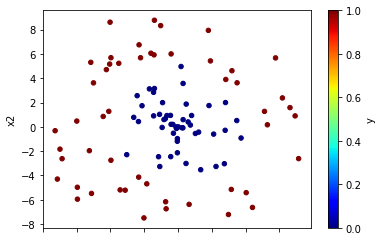

In [18]:
fig = plt.figure(1)
train.plot.scatter('x1', 'x2', c='y', colormap='jet')

In [25]:
# 数据扩展
X_train = np.hstack((X_train, X_train**2))
print(X_train[0:5, :])

X_test = np.hstack((X_test, X_test**2))

[[-4.53443385e-02 -2.13439733e+00  2.05610903e-03  4.55565195e+00]
 [-1.43997254e-01 -2.82385790e-02  2.07352090e-02  7.97417342e-04]
 [ 3.49239266e+00 -2.85503562e-01  1.21968065e+01  8.15122841e-02]
 [-1.08108308e-01 -1.29980407e-01  1.16874062e-02  1.68949063e-02]
 [-1.74444870e+00  3.15369281e+00  3.04310127e+00  9.94577834e+00]]


In [21]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
# K.set_session(sess)
tf.compat.v1.keras.backend.set_session(sess)

file = 'playground2'
if os.path.exists(file+'.h5'):
    model = load_model(file+'.h5')
    # os.rename(file+)
else:
    model = Sequential()
    model.add(Dense(input_dim=4, units=1, activation='sigmoid'))
    # model.add(Dense(1, activation='relu'))
    # model.add(Dense(2, activation='softmax'))
    # model.add(Dropout(0.2))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

In [61]:
# model.fit(X_train, Y_train, batch_size=n, epochs=1000, verbose=1, validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=len(Y_train), epochs=1000, verbose=1)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
print('loss:%.4f accuracy:%.4f' % (loss, accuracy))

Epoch 1/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 2/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 3/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 4/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 5/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 6/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 7/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 8/1000
100/100 [==============================] - 0s 40us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 9/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0365 - accuracy: 1.0000
Epoch 10/1000
100/100 [==============================] - 0s 30us/step - l

Epoch 80/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 81/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 82/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 83/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 84/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 85/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 86/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 87/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 88/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 89/1000
100/100 [==============================] - 0s 30us

Epoch 159/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0356 - accuracy: 1.0000
Epoch 160/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0356 - accuracy: 1.0000
Epoch 161/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0356 - accuracy: 1.0000
Epoch 162/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 163/1000
100/100 [==============================] - 0s 10us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 164/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 165/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 166/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 167/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 168/1000
100/100 [==============================]

Epoch 238/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 239/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 240/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 241/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 242/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 243/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 244/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 245/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 246/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 247/1000
100/100 [==============================]

Epoch 317/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0347 - accuracy: 1.0000
Epoch 318/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0347 - accuracy: 1.0000
Epoch 319/1000
100/100 [==============================] - 0s 10us/step - loss: 0.0347 - accuracy: 1.0000
Epoch 320/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0347 - accuracy: 1.0000
Epoch 321/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0347 - accuracy: 1.0000
Epoch 322/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0346 - accuracy: 1.0000
Epoch 323/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0346 - accuracy: 1.0000
Epoch 324/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0346 - accuracy: 1.0000
Epoch 325/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0346 - accuracy: 1.0000
Epoch 326/1000
100/100 [==============================]

Epoch 395/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0343 - accuracy: 1.0000
Epoch 396/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 397/1000
100/100 [==============================] - 0s 25us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 398/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 399/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 400/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 401/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 402/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 403/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0342 - accuracy: 1.0000
Epoch 404/1000
100/100 [==============================]

Epoch 474/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 475/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 476/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 477/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 478/1000
100/100 [==============================] - 0s 10us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 479/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 480/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 481/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 482/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 483/1000
100/100 [==============================]

Epoch 553/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 554/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 555/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 556/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 557/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 558/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 559/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 560/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 561/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0334 - accuracy: 1.0000
Epoch 562/1000
100/100 [==============================]

Epoch 632/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 633/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 634/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 635/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 636/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 637/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 638/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 639/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 640/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 641/1000
100/100 [==============================]

Epoch 711/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 712/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 713/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 714/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 715/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 716/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 717/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 718/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 719/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 720/1000
100/100 [==============================]

Epoch 790/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 791/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 792/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 793/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 794/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 795/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 796/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 797/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 798/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 799/1000
100/100 [==============================]

Epoch 869/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0319 - accuracy: 1.0000
Epoch 870/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0319 - accuracy: 1.0000
Epoch 871/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 872/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 873/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 874/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 875/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 876/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 877/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 878/1000
100/100 [==============================]

Epoch 948/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 949/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 950/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 951/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 952/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 953/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 954/1000
100/100 [==============================] - 0s 26us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 955/1000
100/100 [==============================] - 0s 20us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 956/1000
100/100 [==============================] - 0s 10us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 957/1000
100/100 [==============================]

In [62]:
Y_train_hat = model.predict_classes(X_train)
Y_test_hat = model.predict_classes(X_test)

In [64]:
# print(type(Y_train_hat))
# print(Y_train_hat.shape)
# print(Y_train.shape)
print(Y_train_hat[:, 0] - Y_train)  # 两者的维数不一样

print(Y_test_hat[:, 0] - Y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


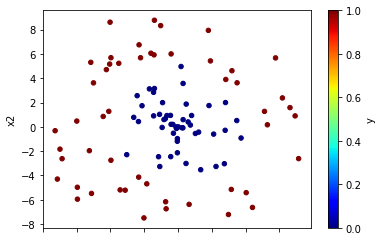

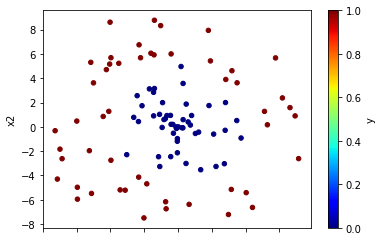

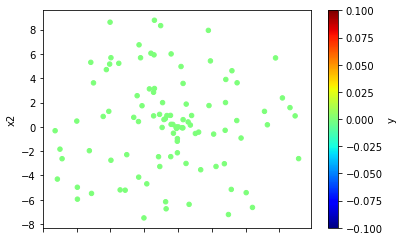

In [66]:
train.plot.scatter('x1', 'x2', c='y', colormap='jet')

train_hat = pd.DataFrame({'x1': X_train[:, 0], 'x2': X_train[:, 1], 'y': Y_train_hat[:, 0]})
train_hat.plot.scatter('x1', 'x2', c='y', colormap='jet')

train_error = pd.DataFrame({'x1': X_train[:, 0], 'x2': X_train[:, 1], 'y': (Y_train_hat[:, 0]-Y_train)})
train_error.plot.scatter('x1', 'x2', c='y', colormap='jet')

# test.plot.scatter('x1', 'x2', c='y', colormap='jet')
# plt.show()

In [44]:
model.save(file+'.h5', overwrite=True)  # 保存模型
model.save(file+'-'+time.strftime("%Y%m%d-%H%M%S", time.localtime())+'.h5')  # 再保存一遍，加上时间